In [1]:
import numpy as np
import pylidc as pl
import matplotlib.pyplot as plt

from skimage.measure import find_contours
from pylidc.utils import consensus


np.int = np.int32
np.float = np.float64
np.bool = np.bool_

/Users/jmanuelc87/Documents/Proyectos/lung-segmentation-lidc-idri/.venv/lib/python3.10/site-packages/pylidc/__init__.py:27: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as _pr


In [2]:
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == "LIDC-IDRI-0001").first()
scan

Scan(id=12,patient_id=LIDC-IDRI-0001)

In [3]:
volume = scan.to_volume()
volume.shape

Loading dicom files ... This may take a moment.


(512, 512, 133)

In [4]:
nods = scan.cluster_annotations()

(512, 512, 133) (512, 512, 8)
(512, 512, 133) (512, 512, 7)
(512, 512, 133) (512, 512, 8)
(512, 512, 133) (512, 512, 9)


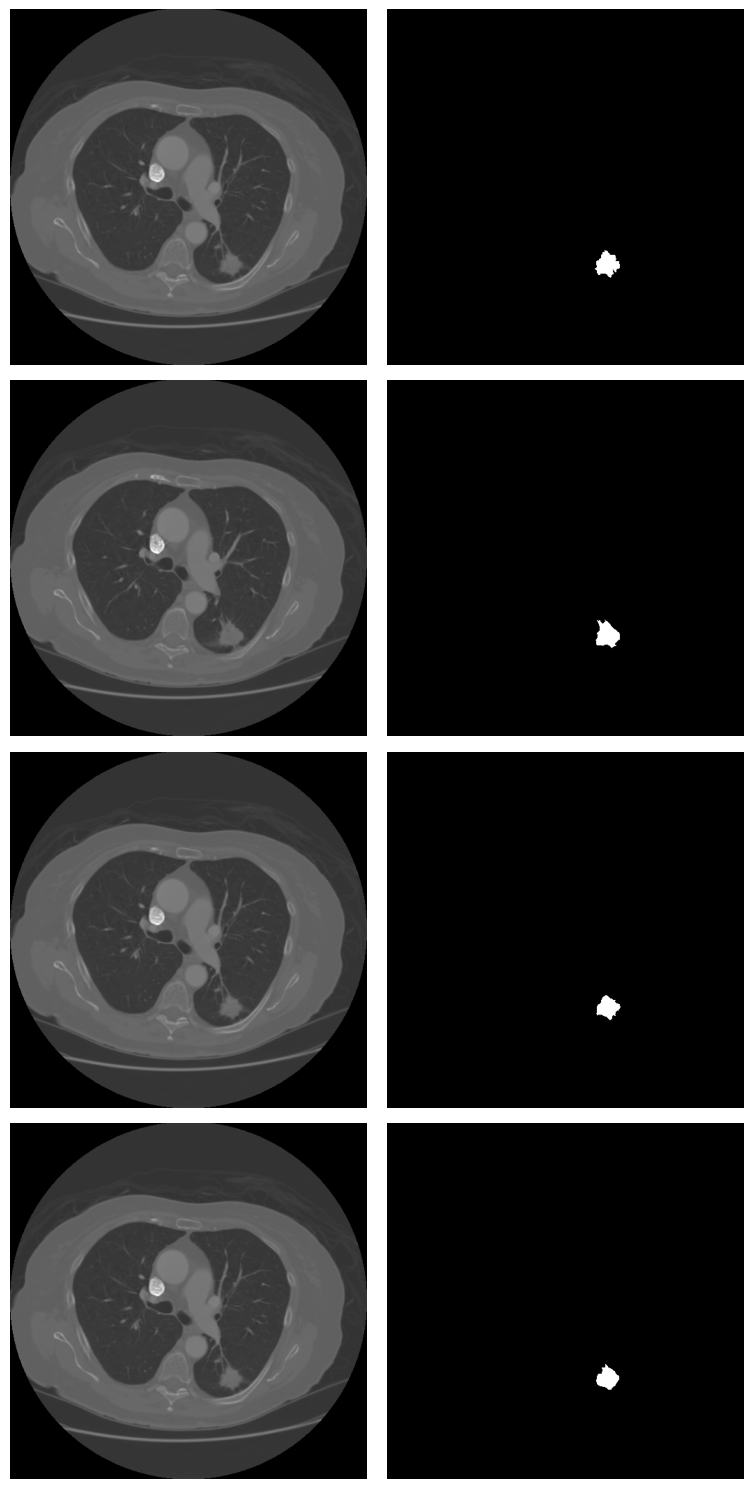

In [ ]:
padding = [(512, 512), (512, 512), (0, 0)]

fig, ax = plt.subplots(len(nods[0]), 2, figsize=(8, 15))

for i, nod in enumerate(nods[0]):
    mask = nods[0][i].boolean_mask(pad=padding)
    bbox = nods[0][i].bbox(pad=padding)

    ax[i][0].imshow(volume[bbox][:, :, 2], cmap="gray")
    ax[i][0].axis("off")

    ax[i][1].imshow(mask[:, :, 2], cmap="gray")
    ax[i][1].axis("off")

plt.tight_layout()
plt.show()

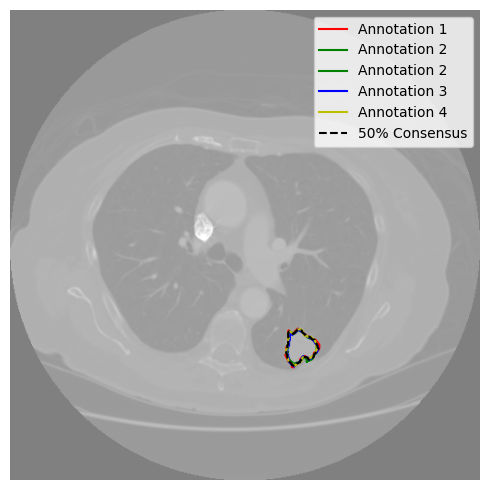

In [6]:
anns = nods[0]

cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(512, 512), (512, 512), (0, 0)])

k = int(0.5 * (cbbox[2].stop - cbbox[2].start))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(volume[cbbox][:, :, k], cmap="gray", alpha=0.5)


colors = ["r", "g", "b", "y"]
for j in range(len(masks)):
    for c in find_contours(masks[j][:, :, k].astype(float), 0.5):
        label = "Annotation %d" % (j + 1)
        plt.plot(c[:, 1], c[:, 0], colors[j], label=label)


for c in find_contours(cmask[:, :, k].astype(float), 0.5):
    plt.plot(c[:, 1], c[:, 0], "--k", label="50% Consensus")


ax.axis("off")
ax.legend()
plt.tight_layout()
plt.show()